In [1]:
!pip install ultralytics roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.9/896.9 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.6 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [3]:
ROBOFLOW_WORKSPACE = "unsignedarduino-9db8i"  # @param {"type":"string"}
ROBOFLOW_PROJECT = "chessbot-pieces-qxp5p"  # @param {"type":"string"}
DATASET_VERSION = 1  # @param {"type":"integer","placeholder":"1, 2, 3..."}

from google.colab import userdata
from roboflow import Roboflow

rf = Roboflow(api_key=userdata.get("ROBOFLOW_API_KEY"))
project = rf.workspace(ROBOFLOW_WORKSPACE).project(ROBOFLOW_PROJECT)
version = project.version(DATASET_VERSION)
dataset = version.download("folder")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Chessbot-Pieces-1 in folder:: 100%|██████████| 688/688 [00:00<00:00, 6031.85it/s]


In [6]:
from pathlib import Path
from ultralytics import YOLO

model = YOLO("yolo11n-cls.pt")

dset_path = Path(dataset.location)

results = model.train(data=dset_path, epochs=50, imgsz=64, plots=True)

Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolo11n-cls.pt, data=/content/Chessbot-Pieces-1, epochs=50, time=None, patience=100, batch=16, imgsz=64, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_

100%|██████████| 5.35M/5.35M [00:00<00:00, 99.7MB/s]


AMP: checks passed ✅


train: Scanning /content/Chessbot-Pieces-1/train... 597 images, 0 corrupt: 100%|██████████| 597/597 [00:00<00:00, 3610.22it/s]

train: New cache created: /content/Chessbot-Pieces-1/train.cache



val: Scanning /content/Chessbot-Pieces-1/test... 18 images, 0 corrupt: 100%|██████████| 18/18 [00:00<00:00, 1605.20it/s]

val: New cache created: /content/Chessbot-Pieces-1/test.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 39 weight(decay=0.0), 40 weight(decay=0.0005), 40 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 64 train, 64 val
Using 2 dataloader workers
Logging results to runs/classify/train
Starting training for 50 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/50     0.151G      2.901         16         64:   5%|▌         | 2/38 [00:01<00:17,  2.11it/s]

       1/50     0.153G      2.767         16         64:  37%|███▋      | 14/38 [00:01<00:01, 12.13it/s]
100%|██████████| 755k/755k [00:00<00:00, 18.1MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00,  9.35it/s]

                   all          0      0.444



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 46.56it/s]

                   all          0      0.444



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 48.32it/s]

                   all          0      0.444



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 47.33it/s]

                   all          0      0.389



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 54.27it/s]

                   all          0      0.333



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 60.47it/s]

                   all          0      0.556



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 52.49it/s]

                   all          0      0.333



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 41.96it/s]

                   all          0      0.333



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 37.78it/s]

                   all          0      0.389



      Epoch    GPU_mem       loss  Instances       Size


      10/50     0.145G     0.3403          5         64: 100%|██████████| 38/38 [00:02<00:00, 17.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 53.34it/s]

                   all          0      0.444



      Epoch    GPU_mem       loss  Instances       Size


      11/50     0.145G     0.2969          5         64: 100%|██████████| 38/38 [00:02<00:00, 16.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 52.47it/s]

                   all          0      0.389



      Epoch    GPU_mem       loss  Instances       Size


      12/50     0.145G     0.2968          5         64: 100%|██████████| 38/38 [00:02<00:00, 17.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 57.12it/s]

                   all          0      0.278



      Epoch    GPU_mem       loss  Instances       Size


      13/50     0.145G     0.2454          5         64: 100%|██████████| 38/38 [00:02<00:00, 15.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 36.51it/s]

                   all          0        0.5



      Epoch    GPU_mem       loss  Instances       Size


      14/50     0.145G     0.2115          5         64: 100%|██████████| 38/38 [00:03<00:00, 11.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 26.18it/s]

                   all          0      0.444



      Epoch    GPU_mem       loss  Instances       Size


      15/50     0.145G     0.2541          5         64: 100%|██████████| 38/38 [00:02<00:00, 14.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 52.47it/s]

                   all          0        0.5



      Epoch    GPU_mem       loss  Instances       Size


      16/50     0.145G     0.1906          5         64: 100%|██████████| 38/38 [00:02<00:00, 17.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 36.19it/s]

                   all          0      0.389



      Epoch    GPU_mem       loss  Instances       Size


      17/50     0.145G     0.1713          5         64: 100%|██████████| 38/38 [00:02<00:00, 17.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 53.67it/s]

                   all          0      0.444



      Epoch    GPU_mem       loss  Instances       Size


      18/50     0.145G     0.1773          5         64: 100%|██████████| 38/38 [00:02<00:00, 17.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 43.20it/s]

                   all          0      0.444



      Epoch    GPU_mem       loss  Instances       Size


      19/50     0.145G     0.1726          5         64: 100%|██████████| 38/38 [00:03<00:00, 11.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 19.28it/s]

                   all          0      0.444



      Epoch    GPU_mem       loss  Instances       Size


      20/50     0.145G     0.1389          5         64: 100%|██████████| 38/38 [00:03<00:00, 12.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 50.63it/s]

                   all          0      0.556



      Epoch    GPU_mem       loss  Instances       Size


      21/50     0.145G     0.1792          5         64: 100%|██████████| 38/38 [00:02<00:00, 17.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 54.68it/s]

                   all          0      0.389



      Epoch    GPU_mem       loss  Instances       Size


      22/50     0.145G     0.1571          5         64: 100%|██████████| 38/38 [00:02<00:00, 16.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 53.26it/s]

                   all          0      0.333



      Epoch    GPU_mem       loss  Instances       Size


      23/50     0.145G     0.1168          5         64: 100%|██████████| 38/38 [00:02<00:00, 16.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 50.36it/s]

                   all          0      0.389



      Epoch    GPU_mem       loss  Instances       Size


      24/50     0.145G     0.1227          5         64: 100%|██████████| 38/38 [00:03<00:00, 12.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 30.88it/s]

                   all          0      0.389



      Epoch    GPU_mem       loss  Instances       Size


      25/50     0.145G     0.1132          5         64: 100%|██████████| 38/38 [00:03<00:00, 11.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 53.26it/s]

                   all          0      0.444



      Epoch    GPU_mem       loss  Instances       Size


      26/50     0.145G     0.1506          5         64: 100%|██████████| 38/38 [00:02<00:00, 16.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 56.27it/s]

                   all          0      0.278



      Epoch    GPU_mem       loss  Instances       Size


      27/50     0.145G     0.1188          5         64: 100%|██████████| 38/38 [00:02<00:00, 16.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 50.73it/s]

                   all          0      0.389



      Epoch    GPU_mem       loss  Instances       Size


      28/50     0.145G     0.1152          5         64: 100%|██████████| 38/38 [00:02<00:00, 17.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 41.48it/s]

                   all          0      0.444



      Epoch    GPU_mem       loss  Instances       Size


      29/50     0.145G     0.1445          5         64: 100%|██████████| 38/38 [00:02<00:00, 13.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 29.62it/s]

                   all          0      0.444



      Epoch    GPU_mem       loss  Instances       Size


      30/50     0.145G      0.178          5         64: 100%|██████████| 38/38 [00:03<00:00, 10.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 23.48it/s]

                   all          0      0.444



      Epoch    GPU_mem       loss  Instances       Size


      31/50     0.145G     0.1249          5         64: 100%|██████████| 38/38 [00:02<00:00, 15.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 51.84it/s]

                   all          0      0.333



      Epoch    GPU_mem       loss  Instances       Size


      32/50     0.145G     0.0912          5         64: 100%|██████████| 38/38 [00:02<00:00, 17.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 45.45it/s]

                   all          0      0.389



      Epoch    GPU_mem       loss  Instances       Size


      33/50     0.145G      0.142          5         64: 100%|██████████| 38/38 [00:02<00:00, 16.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 51.07it/s]

                   all          0      0.556



      Epoch    GPU_mem       loss  Instances       Size


      34/50     0.145G     0.1122          5         64: 100%|██████████| 38/38 [00:02<00:00, 17.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 26.66it/s]

                   all          0      0.389



      Epoch    GPU_mem       loss  Instances       Size


      35/50     0.145G     0.1119          5         64: 100%|██████████| 38/38 [00:03<00:00, 12.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 39.17it/s]

                   all          0      0.333



      Epoch    GPU_mem       loss  Instances       Size


      36/50     0.145G    0.07521          5         64: 100%|██████████| 38/38 [00:03<00:00, 12.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 50.89it/s]

                   all          0      0.444



      Epoch    GPU_mem       loss  Instances       Size


      37/50     0.145G     0.1764          5         64: 100%|██████████| 38/38 [00:02<00:00, 16.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 52.46it/s]

                   all          0      0.444



      Epoch    GPU_mem       loss  Instances       Size


      38/50     0.145G      0.132          5         64: 100%|██████████| 38/38 [00:02<00:00, 17.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 45.87it/s]

                   all          0        0.5



      Epoch    GPU_mem       loss  Instances       Size


      39/50     0.145G     0.1054          5         64: 100%|██████████| 38/38 [00:02<00:00, 17.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 28.05it/s]

                   all          0      0.444



      Epoch    GPU_mem       loss  Instances       Size


      40/50     0.145G     0.1089          5         64: 100%|██████████| 38/38 [00:02<00:00, 12.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 31.37it/s]

                   all          0        0.5



      Epoch    GPU_mem       loss  Instances       Size


      41/50     0.145G    0.09171          5         64: 100%|██████████| 38/38 [00:03<00:00, 11.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 50.27it/s]

                   all          0      0.444



      Epoch    GPU_mem       loss  Instances       Size


      42/50     0.145G    0.09317          5         64: 100%|██████████| 38/38 [00:02<00:00, 16.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 54.76it/s]

                   all          0      0.444



      Epoch    GPU_mem       loss  Instances       Size


      43/50     0.145G    0.07111          5         64: 100%|██████████| 38/38 [00:02<00:00, 16.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 33.19it/s]

                   all          0      0.389



      Epoch    GPU_mem       loss  Instances       Size


      44/50     0.145G     0.0645          5         64: 100%|██████████| 38/38 [00:02<00:00, 13.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 28.45it/s]

                   all          0      0.389



      Epoch    GPU_mem       loss  Instances       Size


      45/50     0.145G    0.04442          5         64: 100%|██████████| 38/38 [00:04<00:00,  9.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 35.90it/s]

                   all          0        0.5



      Epoch    GPU_mem       loss  Instances       Size


      46/50     0.145G    0.07013          5         64: 100%|██████████| 38/38 [00:03<00:00, 10.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 52.82it/s]

                   all          0      0.389



      Epoch    GPU_mem       loss  Instances       Size


      47/50     0.145G     0.0884          5         64: 100%|██████████| 38/38 [00:02<00:00, 16.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 41.01it/s]

                   all          0      0.556



      Epoch    GPU_mem       loss  Instances       Size


      48/50     0.145G    0.04007          5         64: 100%|██████████| 38/38 [00:02<00:00, 15.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 41.85it/s]

                   all          0        0.5



      Epoch    GPU_mem       loss  Instances       Size


      49/50     0.145G    0.06222          5         64: 100%|██████████| 38/38 [00:02<00:00, 16.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 37.04it/s]

                   all          0      0.444



      Epoch    GPU_mem       loss  Instances       Size


      50/50     0.145G    0.08126          5         64: 100%|██████████| 38/38 [00:02<00:00, 13.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 64.79it/s]

                   all          0      0.444



50 epochs completed in 0.045 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 3.2MB
Optimizer stripped from runs/classify/train/weights/best.pt, 3.2MB

Validating runs/classify/train/weights/best.pt...
Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n-cls summary (fused): 112 layers, 1,542,677 parameters, 0 gradients, 3.2 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /content/Chessbot-Pieces-1/train... found 597 images in 13 classes ✅ 
val: None...
test: /content/Chessbot-Pieces-1/test... found 18 images in 5 classes: ERROR ❌️ requires 13 classes, not 5


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 15.01it/s]


                   all          0      0.556
Speed: 0.0ms preprocess, 1.7ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train


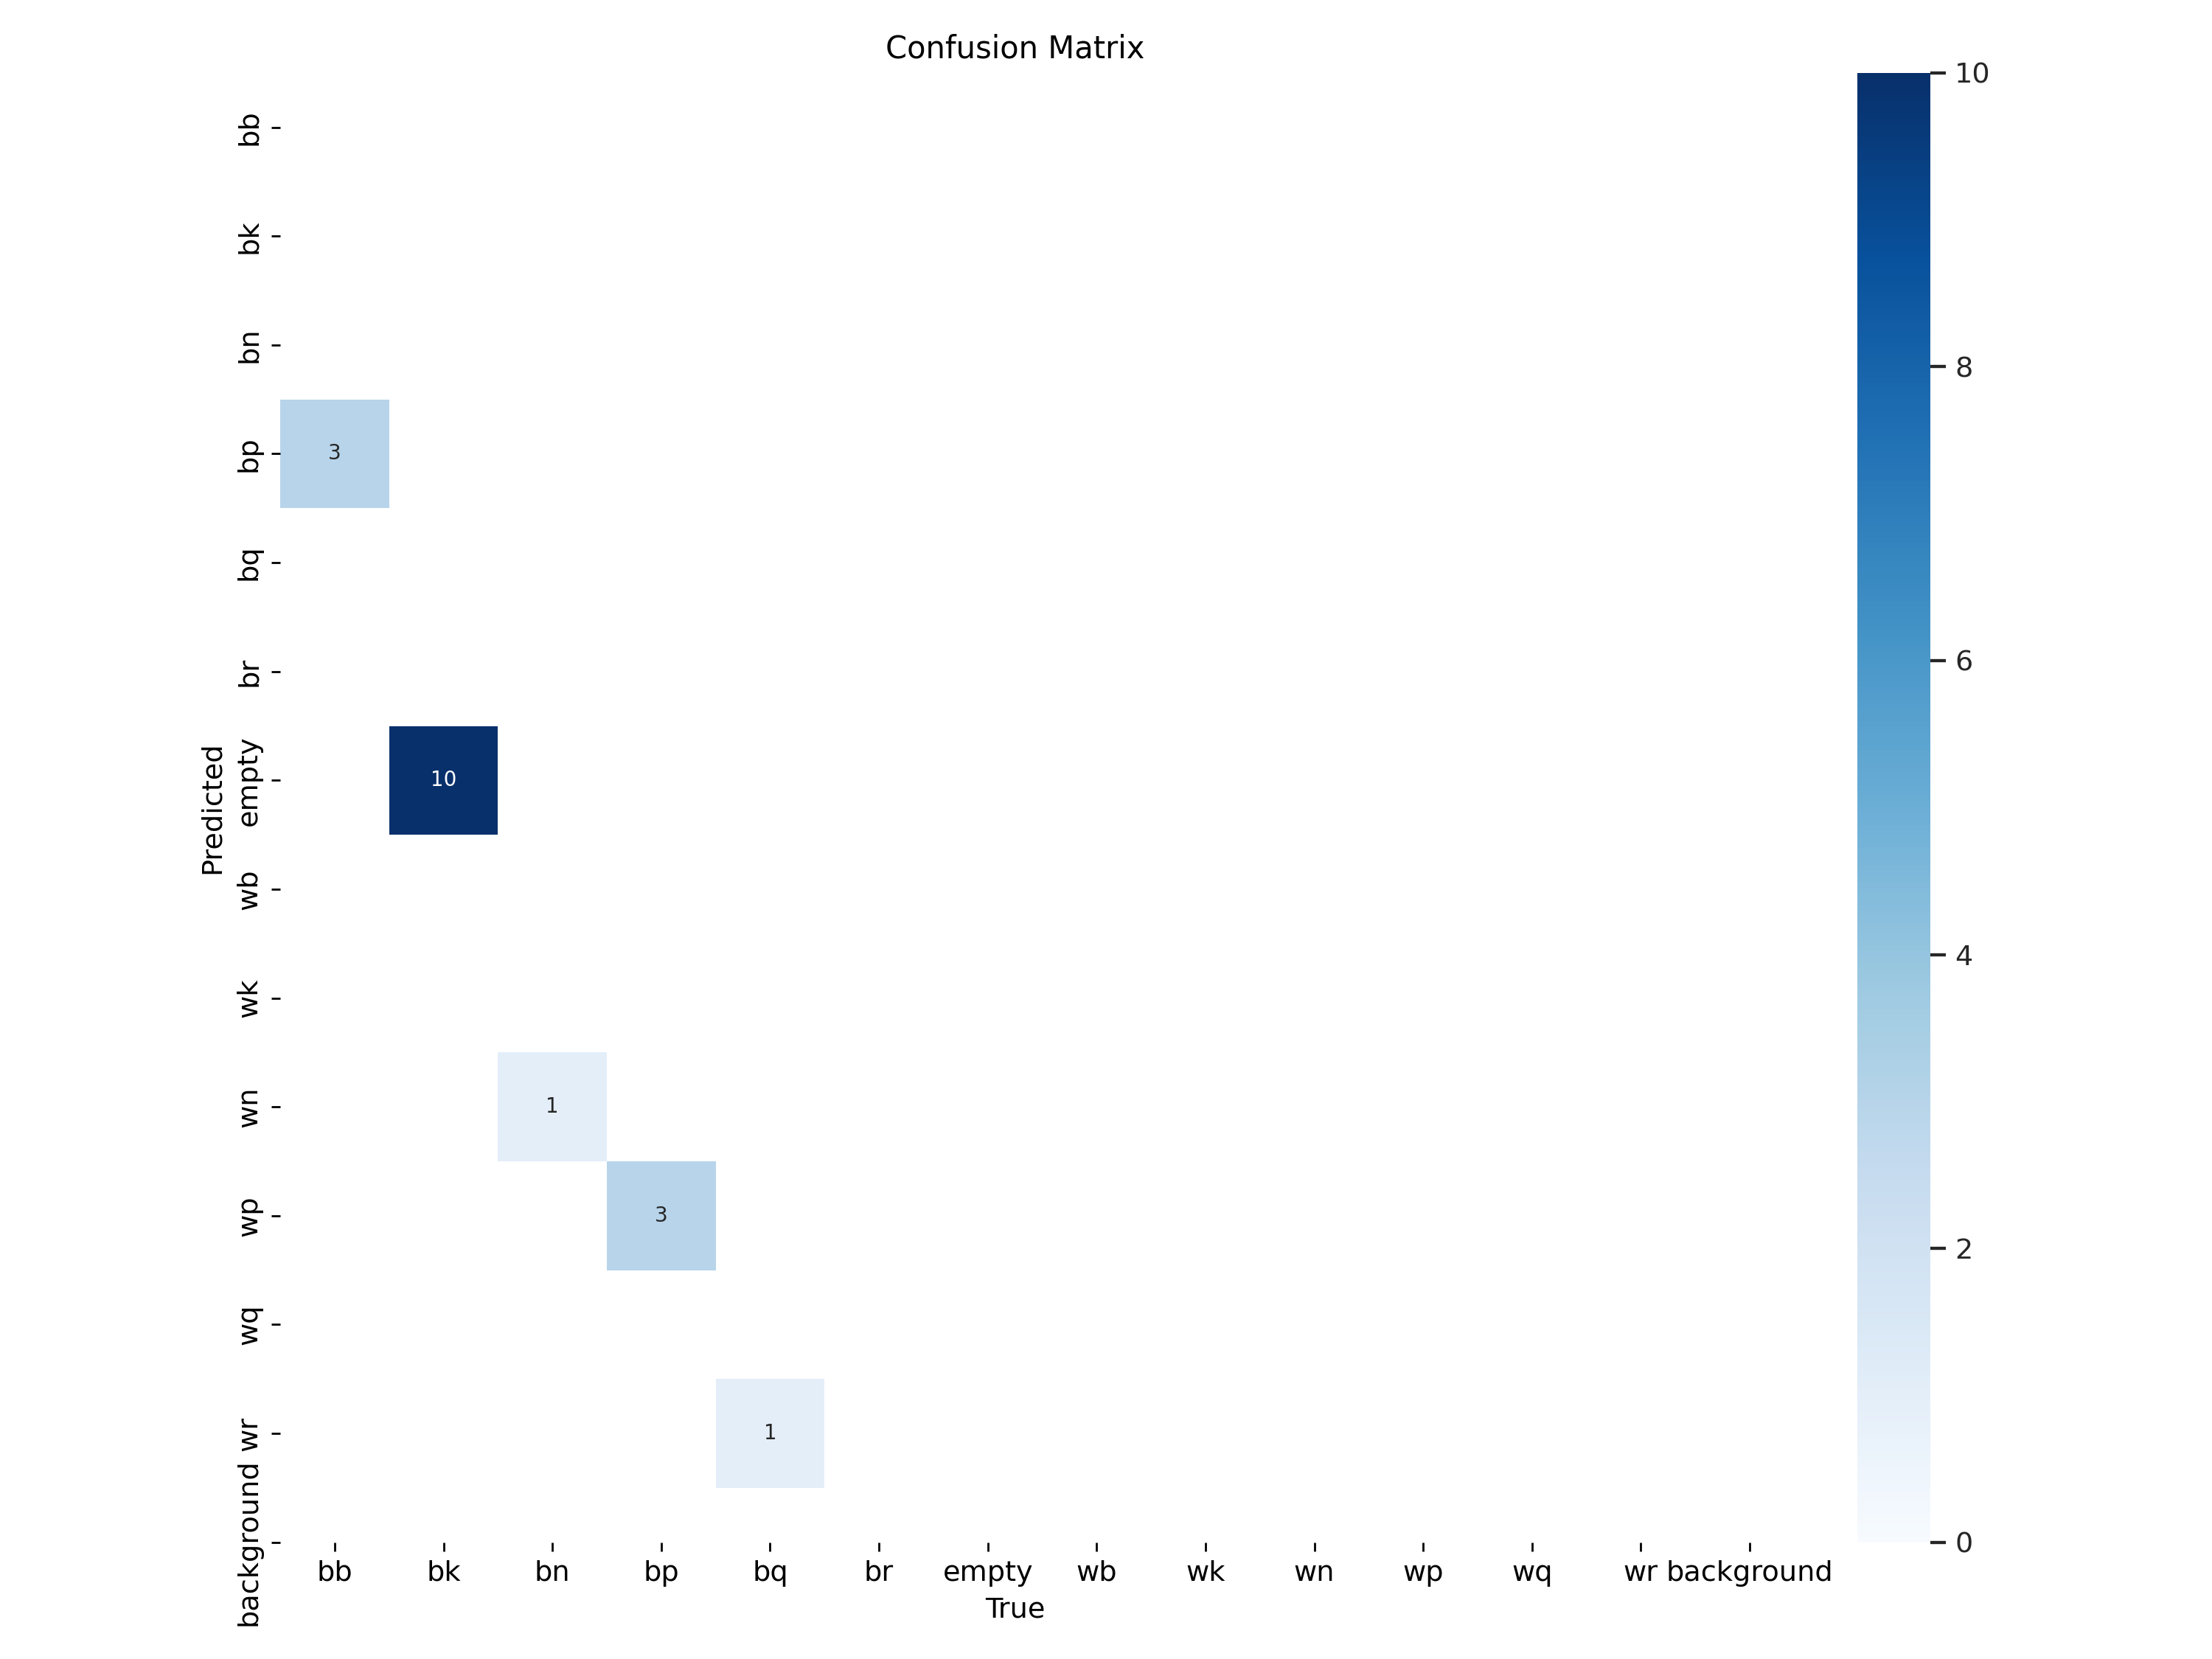

In [10]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'runs/classify/train/confusion_matrix.png', width=600)

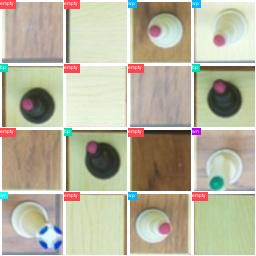

In [13]:
IPyImage(filename=f'runs/classify/train/val_batch0_pred.jpg', width=600)

In [14]:
project.version(dataset.version).deploy(model_type="yolov11", model_path=f"runs/classify/train")

View the status of your deployment at: https://app.roboflow.com/unsignedarduino-9db8i/chessbot-pieces-qxp5p/1
Share your model with the world at: https://universe.roboflow.com/unsignedarduino-9db8i/chessbot-pieces-qxp5p/model/1
